In [145]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torchviz import make_dot
from IPython.display import Image, display

In [146]:
class SimpleFFN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 1)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        return self.fc3(x)

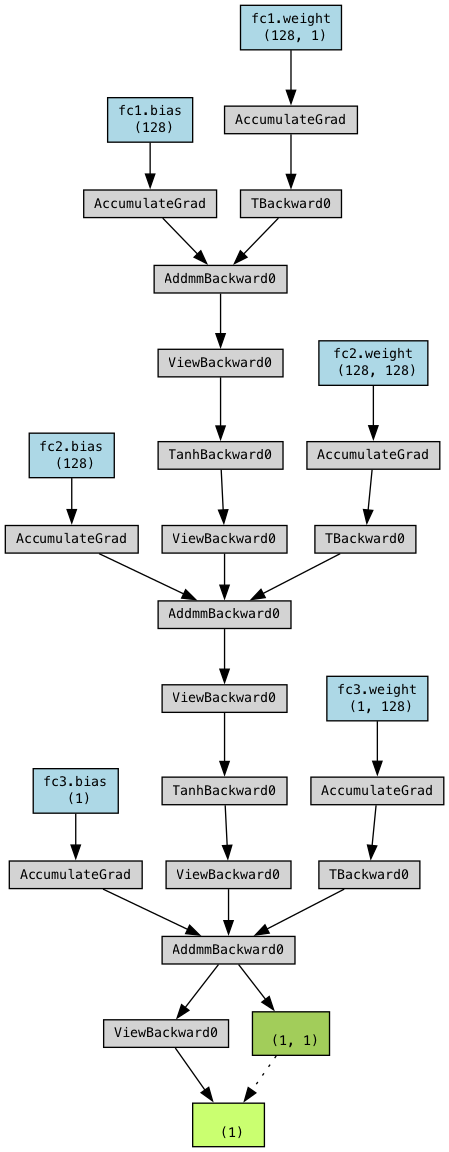

In [147]:
model = SimpleFFN()
sample_input = torch.randn(1)
output = model(sample_input)
dot = make_dot(output, params=dict(model.named_parameters()))
dot.render("simple_ffn_graph", format="png")

display(Image(filename="simple_ffn_graph.png"))

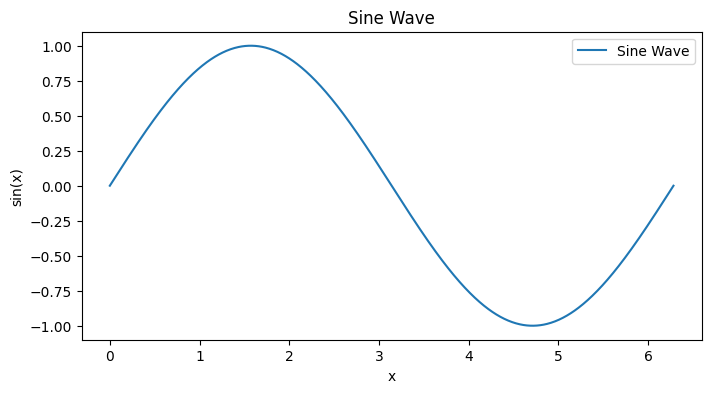

In [148]:
# Generate sine wave data
x = np.linspace(0, 2 * np.pi, 1000)
y = np.sin(x)

# Display the sine wave
plt.figure(figsize=(8, 4))
plt.plot(x, y, label="Sine Wave")
plt.title("Sine Wave")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.legend()
plt.show()

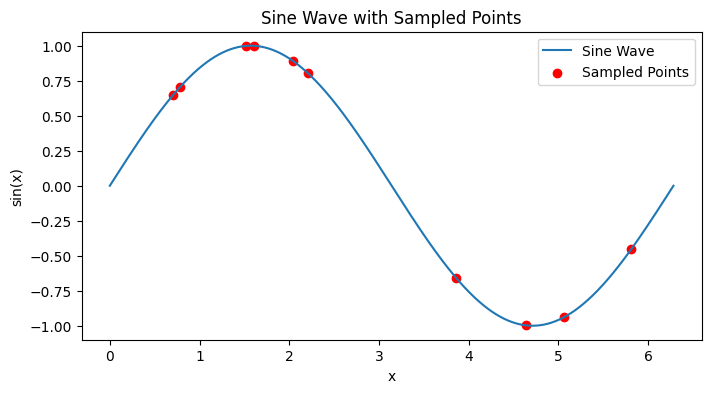

In [149]:
N_SAMPLES = 10

# Sample 100 points from the sine wave data
sample_indices = np.random.choice(len(x), size=N_SAMPLES, replace=False)
x_sample = x[sample_indices]
y_sample = y[sample_indices]

# Plot the sampled points on top of the sine wave
plt.figure(figsize=(8, 4))
plt.plot(x, y, label="Sine Wave")
plt.scatter(x_sample, y_sample, color="red", label="Sampled Points")
plt.title("Sine Wave with Sampled Points")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.legend()
plt.show()

In [150]:
x_sample

array([2.03778983, 0.78618435, 3.86173752, 0.70442118, 2.20760565,
       5.8114747 , 5.0630272 , 1.51576342, 4.64163239, 1.60381607])

In [151]:
y_sample

array([ 0.89292586,  0.70766248, -0.65949357,  0.64759288,  0.80399713,
       -0.45441075, -0.93915368,  0.99848607, -0.9974978 ,  0.9994549 ])

In [155]:
model = SimpleFFN()
model

SimpleFFN(
  (fc1): Linear(in_features=1, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=1, bias=True)
)

Epoch 50/1000, Loss: 0.075697
Epoch 100/1000, Loss: 0.050567
Epoch 150/1000, Loss: 0.039322
Epoch 200/1000, Loss: 0.031113
Epoch 250/1000, Loss: 0.022698
Epoch 300/1000, Loss: 0.017558
Epoch 350/1000, Loss: 0.008974
Epoch 400/1000, Loss: 0.005224
Epoch 450/1000, Loss: 0.002860
Epoch 500/1000, Loss: 0.001391
Epoch 550/1000, Loss: 0.001794
Epoch 600/1000, Loss: 0.000285
Epoch 650/1000, Loss: 0.000140
Epoch 700/1000, Loss: 0.000082
Epoch 750/1000, Loss: 0.000133
Epoch 800/1000, Loss: 0.000047
Epoch 850/1000, Loss: 0.000034
Epoch 900/1000, Loss: 0.000025
Epoch 950/1000, Loss: 0.000033
Epoch 1000/1000, Loss: 0.000102


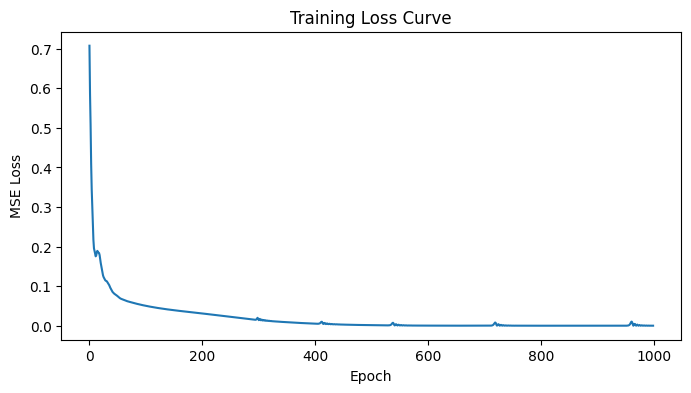

In [ ]:
# Convert sampled data to tensors
x_train = torch.tensor(x_sample, dtype=torch.float32).unsqueeze(1)
y_train = torch.tensor(y_sample, dtype=torch.float32).unsqueeze(1)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
EPOCHS = 1000
losses = []

for epoch in range(EPOCHS):
    model.train()
    optimizer.zero_grad()
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if (epoch + 1) % 50 == 0:
        print(f"Epoch {epoch + 1}/{EPOCHS}, Loss: {loss.item():.6f}")

# Plot loss curve
plt.figure(figsize=(8, 4))
plt.plot(losses)
plt.title("Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.show()


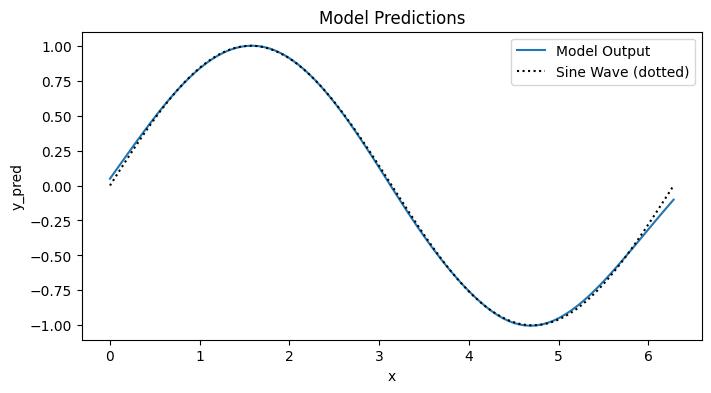

In [153]:
import numpy as np
import matplotlib.pyplot as plt

# Generate inputs from 0 to 2pi
x_test = np.linspace(0, 2 * np.pi, 100)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32).unsqueeze(1)

# Get model predictions
model.eval()
with torch.no_grad():
    y_pred = model(x_test_tensor).squeeze().numpy()

# Display the model outputs with matplotlib and plot sine wave for comparison
plt.figure(figsize=(8, 4))
plt.plot(x_test, y_pred, label="Model Output")
plt.plot(x_test, np.sin(x_test), "k:", label="Sine Wave (dotted)")
plt.title("Model Predictions")
plt.xlabel("x")
plt.ylabel("y_pred")
plt.legend()
plt.show()